# Introduction to numpy and numerical linear algebra


First import the most important modules

In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np

## Numpy arrays
The main advantage of numpy is arrays. It's a way to add / subtract / multiply / ... many numbers in one line.

### Creation of arrays
There are many ways to create arrays, the most important one are listed below

In [ ]:
# create numpy array from a python list
a = np.array([1, 2, 3])
print(a)
print(type(a))

# create numpy array with zeros
b = np.zeros(5)
print(b)

# create numpy array with equal spacing
c = np.linspace(0, 10, 5)  # start stop steps
print(c)
# or
c = np.arange(0, 10, 2)  # start stop stepzise
print(c)

[1 2 3]
<class 'numpy.ndarray'>
[0. 0. 0. 0. 0.]
[ 0.   2.5  5.   7.5 10. ]
[0 2 4 6 8]


Multidimensional arrays are possible, too.

In [ ]:
# create 2d array
d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(d)
print(d.shape)  # shows the dimensions of the array

# or 2d zeros
e = np.zeros((3, 3))
print(e)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### Access and slicing

We can of course also modify the entries of an array:

In [ ]:
a = np.array([1, 2, 3])
print("before", a)
a[0] = 10  # access first element and set it to 10
print("after", a)
print("last element", a[-1])

b = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(b[0, 1])  # access element in the first row, second column

before [1 2 3]
after [10  2  3]
last element 3
2


Another nice feature of numpy is *slicing*, which allows accessing ranges of arrays.
We can use the ":" operator for this, which takes up to three parameters `i:j:k`, denoting the start index, stop index, and step size.

In [ ]:
print(a[1:2])  # Note that the index j itself is not printed
print(a[1:])
# or in higher dimensions
print(b[:, 1])  # access all rows, second column
print(b[1, :])  # access second row, all columns

[2]
[2 3]
[2 5 8]
[4 5 6]


#### Exercises

1. Create an array with times steps between 0, 0.01, 0.02, 0.03 ... 1
    - Print from this the numbers 0.5, 0.51,...,0.56 
2. Create a 3x3 array with the numbers from 1-9. (.reshape may help...)
    - Print the second column, and the second row
    - Change the number in the middle to 55
    - Print the 2nd row and column again


#### Solutions

In [ ]:
# 1
a = np.linspace(0, 1, 101)
print("Ex1\n", a[50:57])
# 2
b = np.arange(0, 9).reshape(3, 3)
print("Ex2\n", b)
print(b[:, 1], b[1, :])
b[1, 1] = 55
print(b[:, 1], b[1, :])

Ex1
 [0.5  0.51 0.52 0.53 0.54 0.55 0.56]
Ex2
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
[1 4 7] [3 4 5]
[ 1 55  7] [ 3 55  5]


### Basic arithmetics and functions

You can add, multiply, ... arrays like normal numbers, if the other element is

- a scalar
- an array of same size

In [ ]:
a = np.linspace(0, 10, 5)
print("a", a)
b = 3 * a + 1
print("3a+1", b)
print("a^2-b", a**2 - b)
print("The sum of ", a, "is ", np.sum(a))

a [ 0.   2.5  5.   7.5 10. ]
3a+1 [ 1.   8.5 16.  23.5 31. ]
a^2-b [-1.   -2.25  9.   32.75 69.  ]
The sum of  [ 0.   2.5  5.   7.5 10. ] is  25.0


This works for functions as well:

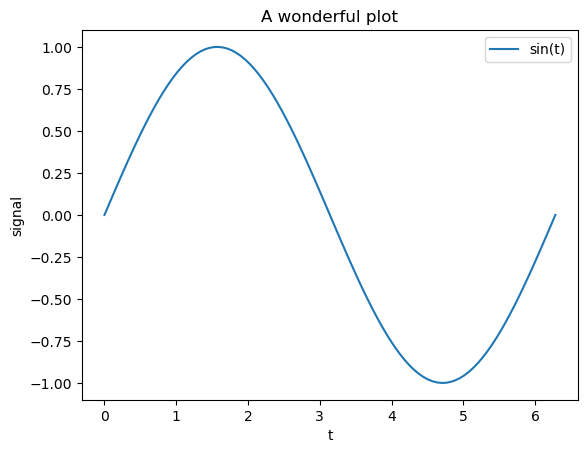

In [ ]:
times = np.linspace(0, 2 * np.pi, 100)
signal = np.sin(times)

plt.plot(times, signal, label="sin(t)")
plt.title("A wonderful plot")
plt.xlabel("t")
plt.ylabel("signal")
plt.legend()
plt.show()

#### Exercises

1. Calculate the scalar product of the vectors (1,2,3) and (3,2,1)
2. Plot the functions $x^2 $ and $ \sqrt{x^2 +1}$ from -1 to 1
    - Add a title and a legend to the plot

#### Solution

4


Text(0.5, 1.0, 'some functions')

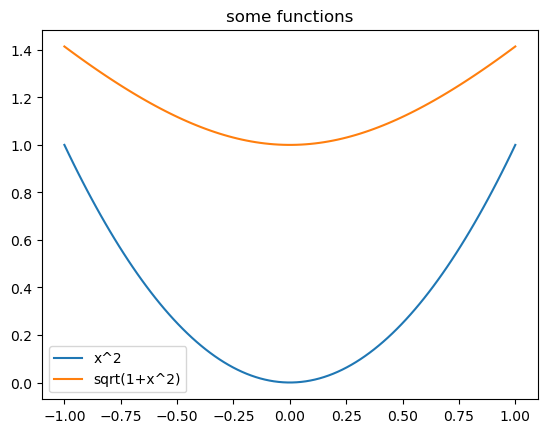

In [ ]:
# 1
a = np.arange(1, 3)
scal_prod = np.sum(a * a[::-1])
print(scal_prod)

# 2
x = np.linspace(-1, 1, 100)
plt.plot(x, x * x, label="x^2")
plt.plot(x, np.sqrt(1 + x * x), label="sqrt(1+x^2)")
plt.legend()
plt.title("some functions")

### Vectors and matrices
Of course, we can use matrices and vectors as well.


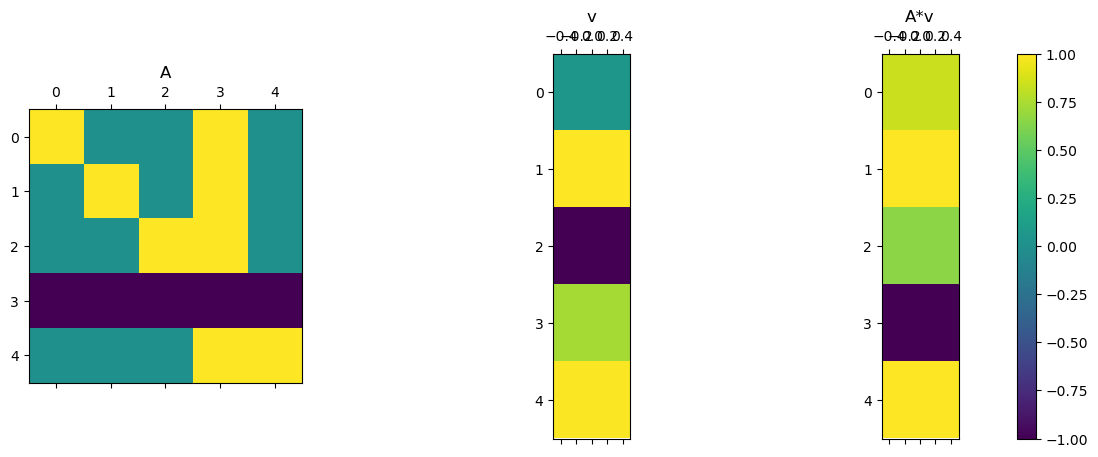

In [ ]:
# create a 5x5 identity matrix
A = np.eye(5)
# modify the matrix
A[:, 3] = 1
A[3, :] = -1
# create a random vector
v = np.random.rand(5)

# calculate matrix vector multiplication A*v
w = A @ v
# or in pictures
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
im = ax[0].matshow(A)
ax[0].set_title("A")
ax[1].matshow(v.reshape(5, 1))  # matshow expects a 2d array
ax[1].set_title("v")
ax[2].matshow(w.reshape(5, 1))
ax[2].set_title("A*v")
fig.colorbar(im, ax=ax)
plt.show()

Another handy function is called `np.diag`, which can be used to operate on diagonals of arrays.

[1. 1. 1. 1. 1.]
[0.72057853 0.04128844 0.68356289 0.54174946 0.47420275]


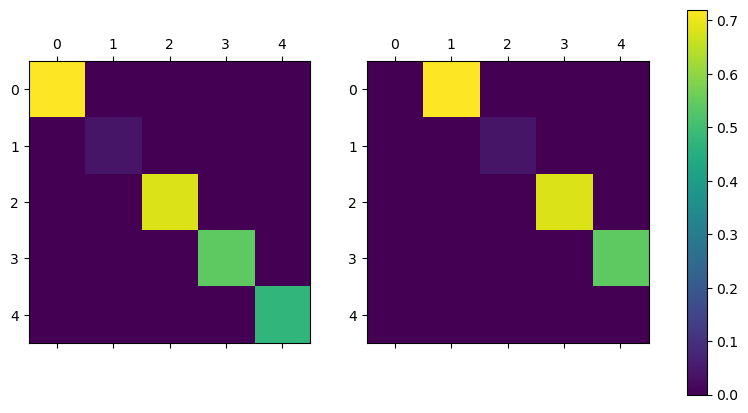

In [ ]:
A = np.eye(5)
print(np.diag(A))
v = np.random.rand(5)
print(v)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].matshow(np.diag(v))
im = ax[1].matshow(np.diag(v[:-1], k=1))
fig.colorbar(im, ax=ax)

#### Exercises

1. Create a random 5x5 Matrix
    - Plot this matrix
2. Create tridiagonal matrix, which has 2 on its diagonal and -1 on both first off diagonals.
    - Apply this matrix to the vector `(0,0,1,0,0)`

#### Solution

[ 0. -1.  2. -1.  0.]


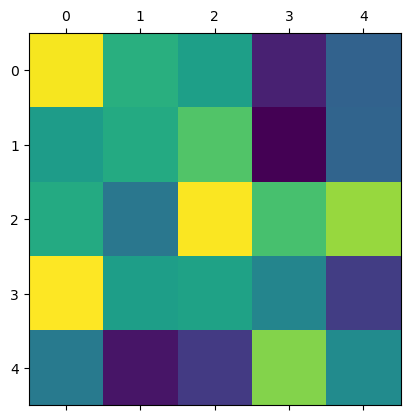

In [ ]:
# 1
A = np.random.rand(5, 5)
plt.matshow(A)

# 2
ones = np.ones(5)
B = 2 * np.diag(ones) - np.diag(ones[1:], k=1) - np.diag(ones[:-1], k=-1)
v2 = np.zeros(5)
v2[2] = 1
print(B @ v2)

### For loops

Let's compare the speed of matrix-vector multiplication in numpy with a simple for-loop.

In [ ]:
n = 1000
A = np.eye(n)
v = np.linspace(0, 1, n)
time_np_start = time.time()
w = A @ v
time_np_end = time.time()
time_np = time_np_end - time_np_start

time_for_loop_start = time.time()
w = np.zeros(n)
for i in range(n):
    for j in range(n):
        w[i] = A[i, j] * v[j]
time_for_loop_end = time.time()
time_for_loop = time_for_loop_end - time_for_loop_start

print("Time required by numpy:", time_np)
print("Time required by standard for loop:", time_for_loop)
print("numpy is", time_for_loop / time_np, "times faster!")

Time required by numpy: 0.0004794597625732422
Time required by standard for loop: 0.19985175132751465
numpy is 416.8269517652909 times faster!


It is good to keep this in mind!

### Masking
Masking is the possibility to select entries of an array by a given array of Booleans or integers

Execute the next Cell several times

In [ ]:
n = 5
v = np.linspace(0, 1, n)
# create array of Booleans
mask = v > 0.5
print(v)
print(mask)
# print only the selction
print(v[mask])
# print  the indices
print(np.where(v > 0.5)[0])

# let's create a random order of this vector
w = np.random.rand(n)
mask2 = np.argsort(w)
print("random vector", w)
print("sorted random vector", w[mask2])
print("random order", v[mask2], "with order", mask2)

[0.   0.25 0.5  0.75 1.  ]
[False False False  True  True]
[0.75 1.  ]
[3 4]
random vector [0.91694354 0.33804247 0.68297681 0.78394407 0.84557605]
sorted random vector [0.33804247 0.68297681 0.78394407 0.84557605 0.91694354]
random order [0.25 0.5  0.75 1.   0.  ] with order [1 2 3 4 0]


#### Exercises

1. Create a random 10 by 10 matrix
    - Plot the matrix
    - Print the position and the maximal value (argmax)
    - Bonus for fast people (Is it before 14:20?)

### Warning: Matrix modifications

In [ ]:
# Case1: Assign an array and modify it afterwards
A = np.eye(5)
B = np.eye(5)
C = A
C[0, 0] = 10
# now, we'd like to check the equality of the two matrices
# A == B is bad idea for floating point numbers
# np.abs(A-B) < 1e-10 creates a boolean array ( |a_ij-b_ij| < 1e-10 )
# np.all returns True if all entries are True
print("Case1: A == B?", np.all(np.abs(A - B) < 1e-10))

# Case2: Copy an array
A = np.eye(5)
B = np.eye(5)
C = A.copy()
C[0, 0] = 10
print("Case2: A == B?", np.all(np.abs(A - B) < 1e-10))

# Case3: Copy all entries
A = np.eye(5)
B = np.eye(5)
C[:, :] = A[:, :]  # all elements
C[0, 0] = 10
print("Case3: A == B?", np.all(np.abs(A - B) < 1e-10))

Case1: A == B? False
Case2: A == B? True
Case3: A == B? True


**What happens here?!**

Explanation:   

For integers, `x=y` means: The value of `x` is copied to `y`. For large arrays, this copy can get very expensive, as we would require double the storage in memory, even if we only changed one value.
Therefore, this is usually avoided and if we run `C=A`, this simply tells the program: "If someone wants to use `C`, look at the place in memory where `A` is stored". So both `A` and `C` point to the same block of memory. Consequently, modifying `C` also changes the values of `A`.

To avoid this, `A.copy()` was introduced. This does a (potentially expensive) copy, for situations where this is actually requierd. So make sure to use copies wisely.

Let's look at this a little further:

In [ ]:
def create_id_matrix():
    A = np.eye(5)
    return A


def some_matrix_mod(A):
    A[0, 0] = 10.0
    return A

In [ ]:
# Case1: create an array via a function
A = np.eye(5)
B = create_id_matrix()
print("Case1:")
print(" A == B?", np.all(np.abs(A - B) < 1e-10))

# Case2: change an array inside a function
A = np.random.rand(5, 5)  # has entries between 0 and 1
B = A.copy()
some_matrix_mod(A)
print("Case2:")
print(" A == B?", np.all(np.abs(A - B) < 1e-10))

# Case3: change the identity inside a function
A = np.eye(5)
B = A.copy()
C = some_matrix_mod(A)
print("Case3:")
print(" A == B?", np.all(np.abs(A - B) < 1e-10))
print(" A == C?", np.all(np.abs(A - C) < 1e-10))

Case1:
 A == B? True
Case2:
 A == B? False
Case3:
 A == B? False
 A == C? True


Weird, isn't it?

Take-home message: If you pass an array to a function, the function will edit the original array. This can be a common source of errors.

#### Exercise:

Predict the behavior of the following functions:

In [ ]:
# a safe, but slow method
# therefore: please avoid this
def some_matrix_mod2(D):
    E = D.copy()
    E[0, :] = 10
    return E


def some_matrix_mod3(D):
    E = D.copy()
    D[-1, -1] = 3
    return E


def some_matrix_mod4(D):
    E = D[:, :]
    D[0, 0] = 3
    return E

In [19]:
# Your prediction (please modify this):
pred_A_equal_B = [False, False, False]
pred_returns_equal_A = [False, False, False]

Please execute the cell above with your input
Now, check it:

In [ ]:
# Array of functions
mat_mods = [some_matrix_mod2, some_matrix_mod3, some_matrix_mod4]

if not np.any(pred_A_equal_B) and not np.any(pred_returns_equal_A):
    print("Please enter your predictions")
else:
    print(not pred_A_equal_B)
    print(not pred_returns_equal_A)
    # for loop over mat_mods; index i increases in parallel
    for i, func in enumerate(mat_mods):
        A = np.random.rand(5, 5)
        B = A.copy()
        C = func(A)
        # A == B
        is_A_equal_B = np.all(np.abs(A - B) < 1e-10)
        # A == C
        is_result_equal_A = np.all(np.abs(A - C) < 1e-10)
        if (
            is_A_equal_B == pred_A_equal_B[i]
            and is_result_equal_A == pred_returns_equal_A[i]
        ):
            print(func, "correct ")
        else:
            print(
                "please modify the prediction for",
                func,
                " and rerun this and the cell above",
            )

Please enter your predictions


#### Solution:
pred_A_equal_B = [True, False, False]  
pred_returns_equal_A = [False, False, True]